<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-1/blob/main/BusquedaPorCsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busqueda por CSV

In [3]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 7.6MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!wget https://www.dropbox.com/s/chfwr4x475y3p1v/noticiasFotos.zip?dl=0 -O 2.zip
!unzip 2.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: 2/467124.jpg            
  inflating: 2/467130.jpg            
  inflating: 2/467131.jpg            
  inflating: 2/467132.jpg            
  inflating: 2/467135.jpg            
  inflating: 2/467136.jpg            
  inflating: 2/467138.jpg            
  inflating: 2/467139.jpg            
  inflating: 2/467140.jpg            
  inflating: 2/46715.jpg             
  inflating: 2/467156.jpg            
  inflating: 2/46716.jpg             
  inflating: 2/467161.jpg            
  inflating: 2/467163.jpg            
  inflating: 2/467164.jpg            
  inflating: 2/467169.jpg            
  inflating: 2/46717.jpg             
  inflating: 2/467170.jpg            
  inflating: 2/467173.jpg            
  inflating: 2/453565.jpg            
  inflating: 2/453569.jpg            
  inflating: 2/45357.jpg             
  inflating: 2/453572.jpg            
  inflating: 2/453576.jpg            
  inflating: 2/453577.jpg  

In [6]:
!wget https://www.dropbox.com/s/lw24ve7ndobd4y5/EmbeddingsFotos.csv?dl=0 -O EmbeddingsFotos.csv

--2021-05-31 09:58:22--  https://www.dropbox.com/s/lw24ve7ndobd4y5/EmbeddingsFotos.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lw24ve7ndobd4y5/EmbeddingsFotos.csv [following]
--2021-05-31 09:58:22--  https://www.dropbox.com/s/raw/lw24ve7ndobd4y5/EmbeddingsFotos.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc82e75b595d02d98077ed0e56c6.dl.dropboxusercontent.com/cd/0/inline/BPh1-U_xYMo-w_9dIiuyLyQ8JUPIyAOS4KoI7XLJBUJCOC1wOBgKj5kgiQ1LJ9hoxpHdT5G-8zE8-wWayl3JZPzd2HndpVuYomPTm6I0s5znTxZQD_zqiF5NkpB3tZkPUKwVrY7gnV86ncAxH9JnNlRi/file# [following]
--2021-05-31 09:58:23--  https://uc82e75b595d02d98077ed0e56c6.dl.dropboxusercontent.com/cd/0/inline/BPh1-U_xYMo-w_9dIiuyLyQ8JUPIyAOS4KoI7XLJBUJCOC1wOBgKj5kgiQ1LJ9h

Foto Entrada

In [7]:
!wget https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0 -O foto.zip
!unzip foto.zip

--2021-05-31 09:58:24--  https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2t7n2q8b8gidjsh/foto.zip [following]
--2021-05-31 09:58:24--  https://www.dropbox.com/s/raw/2t7n2q8b8gidjsh/foto.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4076b0d4e38d37a1ef37f9ec8.dl.dropboxusercontent.com/cd/0/inline/BPjCDP6khadw8uA06RFLcFUTp9B2AFx2hBdaPiPcHma3U8G8LQrFr5UOW0x77eVTqoZUb_lR6phgcdSjwEyrf7IX1MxIhscHVKfCUKZStB-4jpC8NVvivh118qgVk7AUiWhs_9_eOM5R0Yway2ckbMrl/file# [following]
--2021-05-31 09:58:25--  https://ucb4076b0d4e38d37a1ef37f9ec8.dl.dropboxusercontent.com/cd/0/inline/BPjCDP6khadw8uA06RFLcFUTp9B2AFx2hBdaPiPcHma3U8G8LQrFr5UOW0x77eVTqoZUb_lR6phgcdSjwEyrf7IX1MxIhscH

In [8]:
df = pd.read_csv('EmbeddingsFotos.csv')

In [9]:
df.head()

,NombreFoto,Embedding
0,462220.jpg 0,[[ 2.3611324 0.7700528 1.5315906 -1.38208...
1,462220.jpg 1,[[-0.18996963 0.47556552 0.3286136 1.53095...
2,44569.jpg 0,[[-0.67055297 -0.4772751 -0.05659456 0.97165...
3,44569.jpg 1,[[-8.7787104e-01 1.4074993e+00 -9.2881995e-01...
4,44569.jpg 2,[[ 0.55190855 0.47906682 -1.9257076 -0.58596...


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NombreFoto  10290 non-null  object
 1   Embedding   10290 non-null  object
dtypes: object(2)
memory usage: 160.9+ KB
None


### Métodos necesarios

In [11]:
!wget https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0 -O mobilenet_graph.pb
# Leer mobilenet_graph.pb
with tf.io.gfile.GFile('mobilenet_graph.pb','rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Graph().as_default() as mobilenet:
    tf.import_graph_def(graph_def,name='')

--2021-05-31 09:58:26--  https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uji1ufb009ic3m0/mobilenet_graph.pb [following]
--2021-05-31 09:58:27--  https://www.dropbox.com/s/raw/uji1ufb009ic3m0/mobilenet_graph.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucad8d817f3470fd16d6bc8d750f.dl.dropboxusercontent.com/cd/0/inline/BPg370wpladoLJGh8PGqc3zPuQSEBacaDzBWB44wGk_CZmb2l9Jb5vffYSQawXnpjyPKGSOJqJm1ypAvdATPnCrjlC-T0Frvybjn9xhgKDNAlsa19TGtYWCEcM0-f7MAQHp1kG_6uAM-qWKeyTuodgDI/file# [following]
--2021-05-31 09:58:27--  https://ucad8d817f3470fd16d6bc8d750f.dl.dropboxusercontent.com/cd/0/inline/BPg370wpladoLJGh8PGqc3zPuQSEBacaDzBWB44wGk_CZmb2l9Jb5vffYSQawXnpjy

In [12]:
!wget https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0 -O facenet_keras.h5

facenet = load_model('facenet_keras.h5')

--2021-05-31 09:58:29--  https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z0o1of3580smtwr/facenet_keras.h5 [following]
--2021-05-31 09:58:29--  https://www.dropbox.com/s/raw/z0o1of3580smtwr/facenet_keras.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucecbce0d5346db10abf2731e242.dl.dropboxusercontent.com/cd/0/inline/BPhTYzx-Z_Co4u89M1qRb-b9P0_2yZzOK_8QO0rDvuQbGZwj-2A7cs2t7cqn_-p00f8LCWC9ZkwjpOvEJA_SMt958vfzRD8Ve6J_q--2TZVITYwbfzSa7MsdbIBE8ATdM0Ph9qndizI6P7tGcYKkPKFO/file# [following]
--2021-05-31 09:58:30--  https://ucecbce0d5346db10abf2731e242.dl.dropboxusercontent.com/cd/0/inline/BPhTYzx-Z_Co4u89M1qRb-b9P0_2yZzOK_8QO0rDvuQbGZwj-2A7cs2t7cqn_-p00f8LCWC9Z

In [65]:
def load_image(DIR, NAME):
    return cv2.cvtColor(cv2.imread(f'{DIR}/{name}'), cv2.COLOR_BGR2RGB)

def detect_faces(image, score_threshold=0.7):
    global boxes, scores
    (imh, imw) = image.shape[:-1]
    img = np.expand_dims(image,axis=0)
    
    # Inicializar mobilenet
    sess = tf.compat.v1.Session(graph=mobilenet)
    image_tensor = mobilenet.get_tensor_by_name('image_tensor:0')
    boxes = mobilenet.get_tensor_by_name('detection_boxes:0')
    scores = mobilenet.get_tensor_by_name('detection_scores:0')
    
    # Predicción (detección)
    (boxes, scores) = sess.run([boxes, scores], feed_dict={image_tensor:img})
    
    # Reajustar tamaños boxes, scores
    boxes = np.squeeze(boxes,axis=0)
    scores = np.squeeze(scores,axis=0)
    
    # Depurar bounding boxes
    idx = np.where(scores>=score_threshold)[0]
    
    # Crear bounding boxes
    bboxes = []
    for index in idx:
        ymin, xmin, ymax, xmax = boxes[index,:]
        (left, right, top, bottom) = (xmin*imw, xmax*imw, ymin*imh, ymax*imh)
        left, right, top, bottom = int(left), int(right), int(top), int(bottom)
        bboxes.append([left,right,top,bottom])
        
    return bboxes


def extract_faces(image,bboxes,new_size=(160,160)):
    cropped_faces = []
    for box in bboxes:
        left, right, top, bottom = box
        face = image[top:bottom,left:right]
        cropped_faces.append(cv2.resize(face,dsize=new_size))
    return cropped_faces

def compute_embedding(model,face):
    face = face.astype('float32')
    
    mean, std = face.mean(), face.std()
    face = (face-mean) / std
    
    face = np.expand_dims(face,axis=0)
    
    embedding = model.predict(face)
    return embedding

def compare_faces(embs_ref, emb_desc, umbral=10):
    distancias = []
    for emb_ref in embs_ref:
        distancias.append(np.linalg.norm(emb_ref-emb_desc))
    distancias = np.array(distancias)
    return distancias, list(distancias<=umbral)

def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

In [14]:
known_embeddings = []

print('Procesando rostros conocidos...')
for name in os.listdir('foto'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        image = load_image('foto',name)
        bboxes = detect_faces(image)
        face = extract_faces(image,bboxes)
        known_embeddings.append(compute_embedding(facenet,face[0]))

Procesando rostros conocidos...
   conchaAndreu.jpg


Comparación de embeddings

In [51]:
embeddingsModelo = df['Embedding']
nombreFoto = df['NombreFoto']

In [53]:
print(nombreFoto[2])

44569.jpg 0


In [16]:
known_embeddings

[array([[ 0.16271378,  0.48621282,  1.8757733 , -0.8237932 ,  0.65940875,
         -0.3629448 ,  0.33533812,  0.7777411 , -0.45129365, -0.5489631 ,
         -0.06453061,  0.0870657 ,  1.7031118 ,  0.9023485 ,  0.16001502,
         -1.4287704 , -0.16216601, -0.4813192 ,  0.7864006 , -0.20852117,
         -0.905215  , -0.08942058, -0.47549418,  0.5858404 , -0.596419  ,
          0.2051493 , -0.8513644 ,  1.3090646 ,  0.48061842, -0.04805899,
         -0.776615  , -0.5880871 ,  0.75972813, -0.7453167 ,  0.01866461,
          0.5536673 , -0.24610794,  0.09339369, -0.9691724 ,  1.5265123 ,
          1.5485693 ,  1.0119599 ,  0.30268335,  0.30181786, -2.2646067 ,
          0.18283339, -0.99502933, -0.07626563,  0.24588485, -0.50420225,
          1.9102699 ,  2.2888114 ,  0.3953278 , -2.9916036 ,  0.11267579,
          1.0626606 ,  0.31108966,  0.3967505 ,  0.11094663, -0.6404616 ,
          0.9621406 , -1.744543  ,  0.7548506 ,  1.3502482 , -1.2542279 ,
         -0.4172296 , -0.09038731, -0.

In [22]:
lista=embeddingsModelo[1].replace('[','').replace(']','').split(' ')
aux=[]
for elem in lista:
  if elem != '':
    aux.append(float(elem))
aux2=[]
aux2.append(aux)    
fin=[np.array(aux2, dtype='f')]

fin

[array([[-0.18996963,  0.47556552,  0.3286136 ,  1.5309514 ,  0.62813014,
         -0.13005841,  0.10592152, -0.66462034, -0.6861267 , -0.6047762 ,
          0.6668252 , -0.5080282 ,  1.4240074 ,  0.6851475 ,  1.7242337 ,
          0.5311054 , -0.5076395 , -1.4917814 , -1.4583507 ,  0.88369215,
         -0.5048027 , -0.03305591, -0.10728723,  0.3505311 ,  0.18363258,
         -0.60061824,  0.13972794,  0.84549934, -2.3456595 ,  0.5540586 ,
         -0.17170511, -0.88935643, -0.74024487, -0.27362347, -0.26249826,
          1.2041694 , -1.7959503 , -0.39499325, -0.8599583 ,  1.4153278 ,
          1.244695  , -0.57961404,  0.7124711 , -0.47363117,  0.913836  ,
         -1.6095527 ,  2.4872813 ,  0.7789227 ,  1.4479051 ,  0.1625808 ,
          0.5713562 , -0.21613742,  0.94967526, -2.4467711 ,  0.1285314 ,
         -1.7116238 ,  1.0727617 ,  0.9707922 ,  0.76895183,  1.925824  ,
          0.5498862 , -0.92531645,  0.11586294, -1.1201551 ,  0.40122917,
         -3.191715  ,  0.09011545, -0.

188.jpg


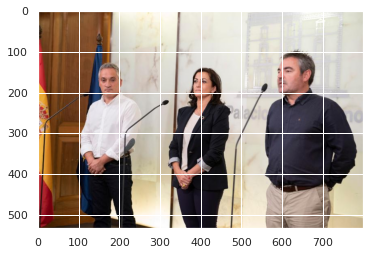

1126.jpg


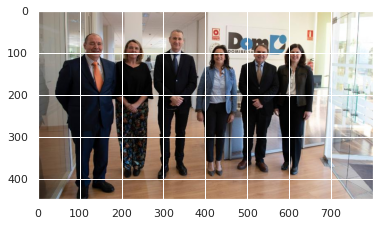

473680.jpg


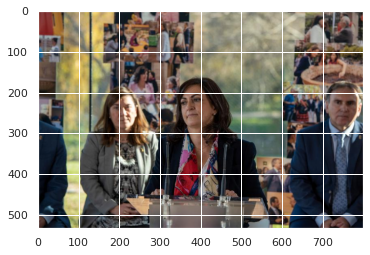

1303.jpg


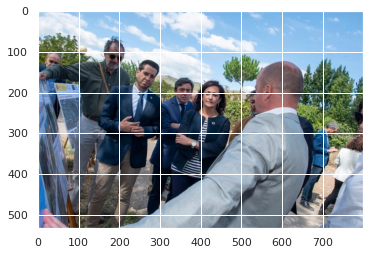

473943.jpg


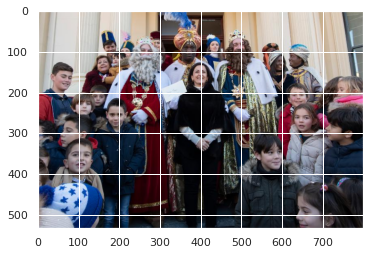

473892.jpg


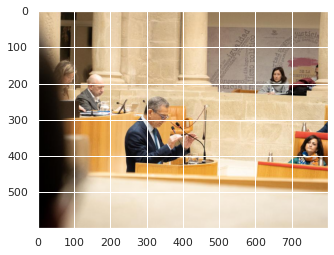

10290


In [66]:
cont=0
listAux=[]
for caraEmb in embeddingsModelo:  
  lista=caraEmb.replace('[','').replace(']','').split(' ')
  aux=[]
  for elem in lista:
    if elem != '':
      aux.append(float(elem))
  aux2=[]
  aux2.append(aux)    
  fin=[np.array(aux2, dtype='f')]

  _, reconocimiento = compare_faces(known_embeddings,fin)

  if any(reconocimiento):
    nomF=nombreFoto[cont].split(' ')[0]
    #if not nomF in listAux:
     # listAux.append(nomF)
      #image = load_image('2', nomF)
      #mostrarImagen(image)
    print(nomF)
    image = cv2.imread("2/"+nomF)
    mostrarImagen(image)

  cont=cont+1;
    

print(cont)